In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np

#### Load data

In [2]:
mnist = fetch_mldata('MNIST original', data_home="./scikit_learn_data")
# from sklearn.datasets.base import get_data_home 
# print (os.getcwd()+"\scikit_learn_data\mldata")

#### Initialize train, and test data set

In [3]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#### Trying to show a sample data

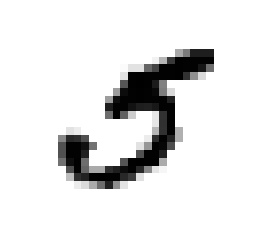

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

#### Choosing best component number, By divide each value by the total sum of eigenvalues prior to plotting, then the plot will show the fraction of total variance retained vs. number of eigenvalues. The plot will then provide a good indication of when you hit the point of diminishing returns 

source : https://stackoverflow.com/questions/12067446/how-many-principal-components-to-take

Text(0,0.5,'Cumulative explained variance')

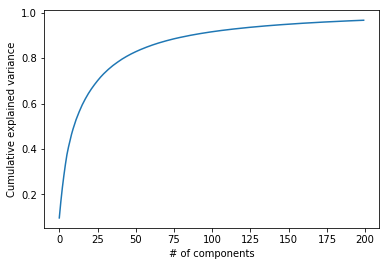

In [5]:
from sklearn.decomposition import PCA
pca = PCA(200)
pca_full = pca.fit(X_train)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

#### I pick 50 component,and uses it to transform the training and test set, 
#### while also splitting training set into train and validation set

In [6]:
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_train_transformed, y_train, test_size=0.2)

In [7]:
component = 50
k = 5
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train_pca[: , :component], y_train_pca)
score = model.score(X_test_pca[:, :component], y_test_pca)
message = "Score : {} , Component : {} , K : {}"
print(message.format(score, component, k))

Score : 0.9775 , Component : 50 , K : 5


#### Now that we reach 97.5 % on validation, next trying on test data

In [8]:
score = model.score(X_test_transformed[:, :component], y_test)
print("Score: {}".format(score))

Score: 0.9728


#### Succeed reaching 97.4% with 50 component PCA, and 5 k